## **Linear Regression with Stochastic Gradient Descent**

The purpose of this experiment is to perform linear regression using Stochastic Gradient Descent with penalties of 'Elastic Net' and 'Ridge Regression', k-cross validation with k=5 along with simple linear regression, and compare the accuracy of the three different approaches. For this, the Boston Dataset will be used to predict the median value of owner-occupied homes.

Before fitting the models, let's start with some data exploration.

### **Data Exploration**

First, let's import necessary libraries and load the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
  warnings.filterwarnings("ignore")
  data = load_boston()

Let's take a look at the dataset description.

In [3]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

Now, let's create a dataframe including the data and target arrays obtained from load_boston.

In [4]:
boston = pd.DataFrame(data['data'], columns = data['feature_names'])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston['MEDV'] = data['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


With this new dataframe, we can check the info, describe and isnull methods to verify that our data does not have any missing values and obtain some descriptive statistics.

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Now, let's look at the distributions of the variables and check for outliers with some boxplots.

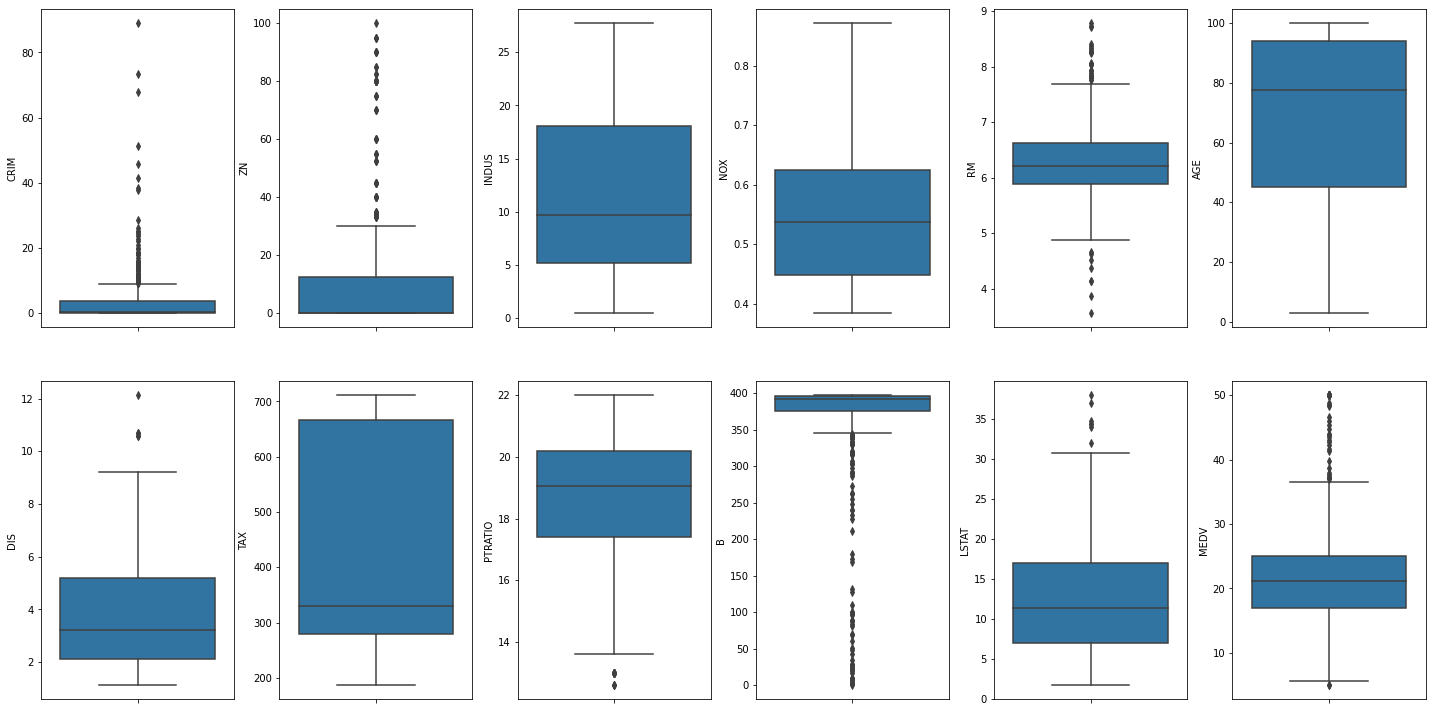

In [9]:
# checking for outliers and distribution
fig,axs = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
axs=axs.flatten()
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS',
       'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
for k in columns:
  sns.boxplot(y=boston[k], ax=axs[index])
  index += 1
plt.tight_layout(w_pad = 0.5, h_pad=5.0)

From the boxplots shown above, we can infer that the variables CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT and MEDV all have some outliers. Additionally, most variables have a skewed distribution.

Now, let's check the joint distributions of our response variable along with each of the other features using scatterplots.

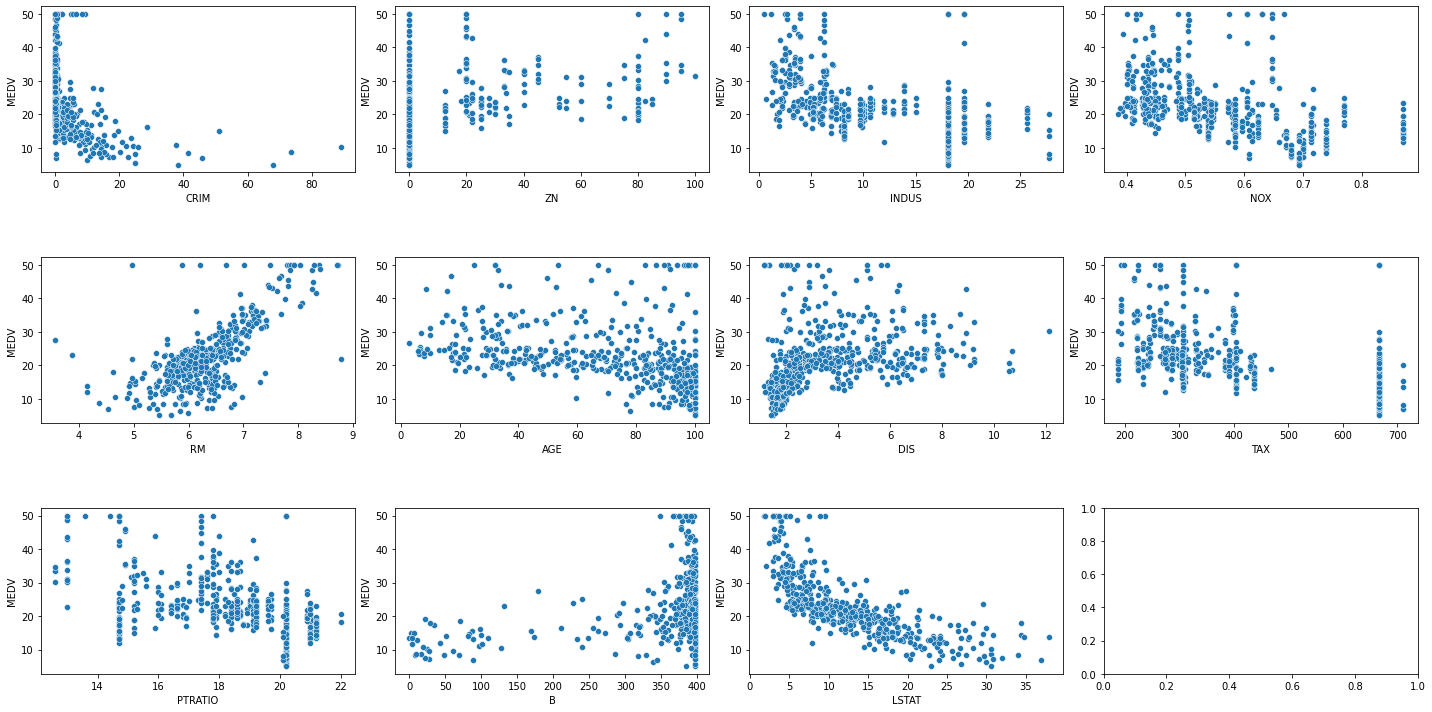

In [10]:
# checking joint distributions for the response with the predictors
x = boston[columns[:-1]]
y = boston['MEDV']
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20,10))
#index=0
axs = axs.flatten()
for i,column in enumerate(columns[:-1]):
  sns.scatterplot(y=y, x=x[column], ax=axs[i])
plt.tight_layout(w_pad = 0.5, h_pad=5.0)

Additionally, let's look at the correlation heatmap for all variables.

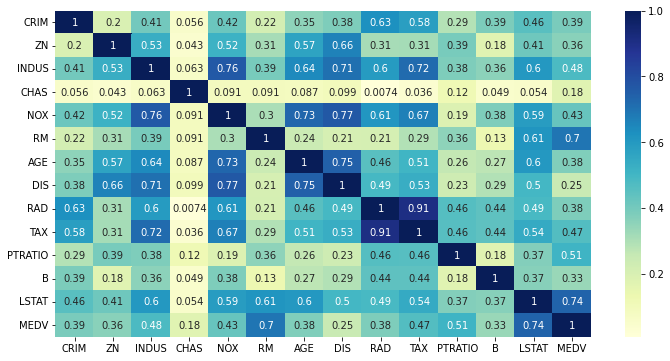

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.heatmap(boston.corr().abs(), cmap='YlGnBu',  annot=True)

We can see that MEDV is highly correlated to LSTAT and RM. From the scatterplots above, MEDV appears to increase as RM increases and it tends to decrease as LSTAT increases. However, the releatinship between MEDV and LSTAT does not appear to be completely linear.

Additionally, there are some predictors that could represent a multicollinearity issue for our models. For instance, INDUS is highly correlated with NOX, DIS and TAX. However, since we're not trying to understand the relationshio between predictors and response, and multicollinearity does not affect prediction accuracy, we'll ignore this issue.

Based on the scatterplots, let's use LSTAT, RM, PTRATIO, TAX, INDUS, AGE, DIS, NOX and B.

### **Models Training**

In [12]:
X = boston[['INDUS', 'NOX', 'RM', 'AGE', 'DIS',
       'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston['MEDV']

First, let's split the data into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train.head()

,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
204,2.68,0.4161,8.034,31.9,5.1180,224.0,14.7,390.55,2.88
370,18.10,0.6310,7.016,97.5,1.2024,666.0,20.2,392.05,2.96
485,18.10,0.5830,6.312,51.9,3.9917,666.0,20.2,388.62,10.58
86,4.49,0.4490,6.015,45.1,4.4272,247.0,18.5,395.99,12.86
241,4.93,0.4280,6.095,65.1,6.3361,300.0,16.6,394.62,12.40


In [16]:
y_train.head()

204    50.0
370    50.0
485    21.2
86     22.5
241    20.1
Name: MEDV, dtype: float64

Now, before fitting the models, let's scale the data. Since we saw before that some variables have outliers, we're going to use a robust scaler, which ignores the outliers when scaling the data by using the median and IQR, instead of the mean and standard deviation.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate

In [18]:
X_scl = RobustScaler().fit_transform(X_train)
y_scl = RobustScaler().fit_transform(y_train.array.reshape(-1,1))

In [19]:
X_test_scl = RobustScaler().fit_transform(X_test)
y_test_scl = RobustScaler().fit_transform(y_test.array.reshape(-1,1))

#### **Linear Regression**

Now, let's create our linear regressor and use it with the cross_validate function to obtain the results of linear regression in the 5 sets for our training dataset. We'll set the return_estimator parameter to True so that the function returns the estimators fitted on each split, which we can then use to make predictions on our test dataset.

In [20]:
lm = LinearRegression()
cv_lm = cross_validate(lm, X_scl, y_scl, cv = 5, 
                       scoring = ['r2','neg_mean_squared_error','neg_root_mean_squared_error'],
                       return_estimator = True)
sorted(cv_lm.keys())

['estimator',
 'fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [21]:
cv_lm['estimator']

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [22]:
print("MSEs: \n{}".format(-1*cv_lm['test_neg_mean_squared_error']))
print("Average MSE: {}.".format(-1*cv_lm['test_neg_mean_squared_error'].mean()))

print("R2s: \n{}".format(cv_lm['test_r2']))
print("Average R2: {}.".format(cv_lm['test_r2'].mean()))


MSEs: 
[0.62001608 0.3633874  0.29121676 0.36428226 0.36499138]
Average MSE: 0.4007787752976677.
R2s: 
[0.6055048  0.66023271 0.79619101 0.74219967 0.60439093]
Average R2: 0.6817038241262757.


Now, let's use the estimators fitted on each split to predict and evaluate the model on the test set.

In [23]:
from sklearn import metrics
MSE_lm_test = []
R2_lm_test = []
for reg in cv_lm['estimator']:
  y_hat = reg.predict(X_test_scl)
  MSE_lm_test.append(metrics.mean_squared_error(y_test_scl,y_hat))
  R2_lm_test.append(metrics.r2_score(y_test_scl,y_hat))
MSE_lm_test = np.array(MSE_lm_test)
R2_lm_test = np.array(R2_lm_test)
print("MSEs for test dataset: \n{}".format(MSE_lm_test))
print("Average MSE for test dataset: \n{}".format(MSE_lm_test.mean()))

print("R2s for test dataset: \n{}".format(R2_lm_test))
print("Average R2 for test dataset: \n{}".format(R2_lm_test.mean()))


MSEs for test dataset: 
[0.38164261 0.32213371 0.34054031 0.32717505 0.32554441]
Average MSE for test dataset: 
0.33940721771718085
R2s for test dataset: 
[0.46690608 0.55003053 0.52431944 0.54298858 0.54526633]
Average R2 for test dataset: 
0.5259021945132856


#### **Ridge Regression**

Now, let's see how the results change when we add a Ridge Regression regularization term. In this case, we're going to use the Stochastic Gradient Descent Regressor.

First, let's use RidgeCV to find out the best alpha to use. For this, let's create and fit a Ridge Regression with 5 possible alpha values. The alpha_ attribute will reveal the best alpha value from the 5.

In [24]:
# to choose the best alpha
from sklearn.linear_model import RidgeCV
from numpy import arange
ridge_cv = RidgeCV(alphas=arange(0.1,10,0.1))
model = ridge_cv.fit(X_scl, y_scl)
model.alpha_

6.3

Now, let's perform ridge regression with alpha=10 and k-cross validation with k=5.

In [25]:
from sklearn.linear_model import SGDRegressor
m = len(X_train)
sgd_ridge = SGDRegressor(penalty="l2", alpha=6.3/m, max_iter=300, tol=None)
cv_ridge = cross_validate(sgd_ridge, X_scl, y_scl.ravel(), cv = 5, 
                          scoring = ['r2','neg_mean_squared_error','neg_root_mean_squared_error'],
                          return_estimator = True)
sorted(cv_ridge.keys())

['estimator',
 'fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_neg_root_mean_squared_error',
 'test_r2']

In [26]:
print("MSEs: \n{}".format(-1*cv_ridge['test_neg_mean_squared_error']))
print("Average MSE: {}.".format(-1*cv_ridge['test_neg_mean_squared_error'].mean()))

print("R2s: \n{}".format(cv_ridge['test_r2']))
print("Average R2: {}.".format(cv_ridge['test_r2'].mean()))

MSEs: 
[0.64383491 0.37750533 0.27973547 0.36377223 0.35878726]
Average MSE: 0.40472704148688515.
R2s: 
[0.59034968 0.64703244 0.80422623 0.74256061 0.61111549]
Average R2: 0.6790568904732439.


Again, we'll use the estimator from each split to predict on the test dataset.

In [27]:
MSE_ridge_test = []
R2_ridge_test = []
for reg in cv_ridge['estimator']:
  y_hat = reg.predict(X_test_scl)
  MSE_ridge_test.append(metrics.mean_squared_error(y_test_scl,y_hat))
  R2_ridge_test.append(metrics.r2_score(y_test_scl,y_hat))
MSE_ridge_test = np.array(MSE_ridge_test)
R2_ridge_test = np.array(R2_ridge_test)
print("MSEs for test dataset: \n{}".format(MSE_ridge_test))
print("Average MSE for test dataset: \n{}".format(MSE_ridge_test.mean()))

print("R2s for test dataset: \n{}".format(R2_ridge_test))
print("Average R2 for test dataset: \n{}".format(R2_ridge_test.mean()))


MSEs for test dataset: 
[0.37105933 0.30009663 0.32030903 0.30296959 0.31818288]
Average MSE for test dataset: 
0.32252349170113204
R2s for test dataset: 
[0.48168924 0.58081282 0.55257932 0.57679976 0.55554921]
Average R2 for test dataset: 
0.549486069678008


#### **Elastic Net**

Before fitting the model, let's find out the best alpha and l1_ratio to use for our data.

In [ ]:
from sklearn.model_selection import GridSearchCV
hparams = {'best_params':{},
           'MSE':{}}
for i in arange(0,5,1):
  model = SGDRegressor(penalty='elasticnet', tol=None, max_iter=1)
  grid = dict()
  grid['l1_ratio'] = arange(0, 1, 0.01)
  grid['alpha'] = arange(0.1,10,0.1)/m
  search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
# perform the search
  results = search.fit(X_scl, y_scl.ravel())
  hparams['best_params'][i] = results.best_params_
  hparams['MSE'][i] = results.best_score_

In [ ]:
hparams

{'MSE': {0: -0.49769267368675757,
  1: -0.49955807104370165,
  2: -0.5007954631695474,
  3: -0.4990933596418782,
  4: -0.49991133270177385},
 'best_params': {0: {'alpha': 0.0062146892655367235, 'l1_ratio': 0.04},
  1: {'alpha': 0.007909604519774013, 'l1_ratio': 0.21},
  2: {'alpha': 0.0025423728813559325, 'l1_ratio': 0.16},
  3: {'alpha': 0.007627118644067797, 'l1_ratio': 0.4},
  4: {'alpha': 0.008192090395480228, 'l1_ratio': 0.71}}}

Results vary because of the stochastic nature of the algorithm. However, the loop was ran 5 times and the lowest MSE corresponds to alpha = 0.0076 and l1_ratio = 0.4. Disclaimer: The loop took more than 5 minutes to run.

Finally, let's see how the results change when we add an elastic net regularization term. Again, we'll use the stochastic gradient descent regressor.

In [28]:
sgd_en = SGDRegressor(penalty="elasticnet", alpha=0.0076, max_iter=300, tol=None, l1_ratio=0.4)
cv_en = cross_validate(sgd_en, X_scl, y_scl.ravel(), cv = 5, 
                       scoring = ['r2','neg_mean_squared_error','neg_root_mean_squared_error'],
                       return_estimator = True)

In [29]:
print("MSEs: \n{}".format(-1*cv_en['test_neg_mean_squared_error']))
print("Average MSE: {}.".format(-1*cv_en['test_neg_mean_squared_error'].mean()))

print("R2s: \n{}".format(cv_en['test_r2']))
print("Average R2: {}.".format(cv_en['test_r2'].mean()))

MSEs: 
[0.61150116 0.36537903 0.27172786 0.35649993 0.36032747]
Average MSE: 0.39308708999126674.
R2s: 
[0.61092255 0.65837054 0.80983038 0.74770717 0.60944609]
Average R2: 0.6872553447592743.


In [30]:
MSE_en_test = []
R2_en_test = []
for reg in cv_en['estimator']:
  y_hat = reg.predict(X_test_scl)
  MSE_en_test.append(metrics.mean_squared_error(y_test_scl,y_hat))
  R2_en_test.append(metrics.r2_score(y_test_scl,y_hat))
MSE_en_test = np.array(MSE_en_test)
R2_en_test = np.array(R2_en_test)
print("MSEs for test dataset: \n{}".format(MSE_en_test))
print("Average MSE for test dataset: \n{}".format(MSE_en_test.mean()))

print("R2s for test dataset: \n{}".format(R2_en_test))
print("Average R2 for test dataset: \n{}".format(R2_en_test.mean()))


MSEs for test dataset: 
[0.34778499 0.31217451 0.3522142  0.32791762 0.32870536]
Average MSE for test dataset: 
0.3337593360400727
R2s for test dataset: 
[0.51419978 0.56394195 0.50801289 0.54195133 0.54085098]
Average R2 for test dataset: 
0.5337913853406793


#### **Comparison**

In [31]:
CV_MSEs = {}
CV_MSEs['Linear Regression'] = -1*cv_lm['test_neg_mean_squared_error']
CV_MSEs['Ridge Regression'] = -1*cv_ridge['test_neg_mean_squared_error']
CV_MSEs['Elastic Net'] = -1*cv_en['test_neg_mean_squared_error']
test_MSEs = {}
test_MSEs['Linear Regression'] = MSE_lm_test
test_MSEs['Ridge Regression'] = MSE_ridge_test
test_MSEs['Elastic Net'] = MSE_en_test
CV_MSEs = pd.DataFrame(CV_MSEs)
test_MSEs = pd.DataFrame(test_MSEs)

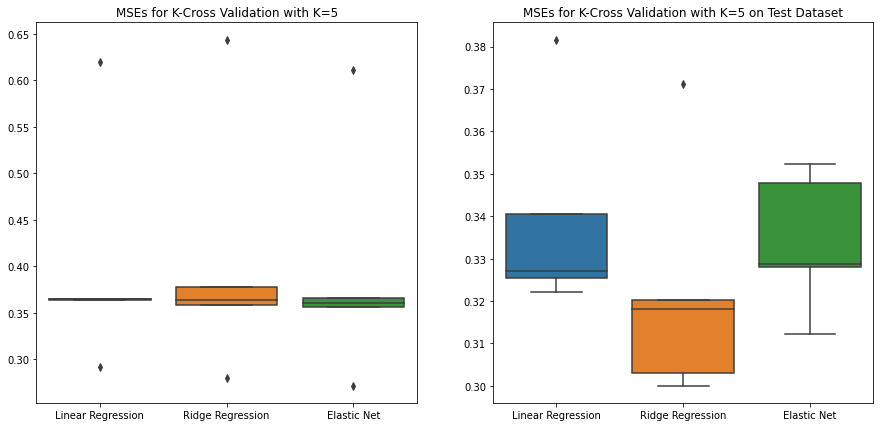

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7)) # create 2x2 array of subplots
axes[0].title.set_text("MSEs for K-Cross Validation with K=5")
sns.boxplot(data=CV_MSEs, ax = axes[0])
axes[1].title.set_text("MSEs for K-Cross Validation with K=5 on Test Dataset")
sns.boxplot(data=test_MSEs, ax = axes[1])

From the boxplots above, it can be noted that there's not much difference in performance for the K-Cross Validation in the training set. However, when we use the estimators from each of the 5 splits to predict on the test set, Elastic Net and Ridge Regression perform much better with MSEs smaller (in range and quantity) than simple linear regression. Nevertheless, all 3 cases appear to perform better on the new data (test set), since the range of MSEs is smaller.

In [33]:
CV_R2s = {}
CV_R2s['Linear Regression'] = cv_lm['test_r2']
CV_R2s['Ridge Regression'] = cv_ridge['test_r2']
CV_R2s['Elastic Net'] = cv_en['test_r2']
test_R2s = {}
test_R2s['Linear Regression'] = R2_lm_test
test_R2s['Ridge Regression'] = R2_ridge_test
test_R2s['Elastic Net'] = R2_en_test
CV_R2s = pd.DataFrame(CV_R2s)
test_R2s = pd.DataFrame(test_R2s)

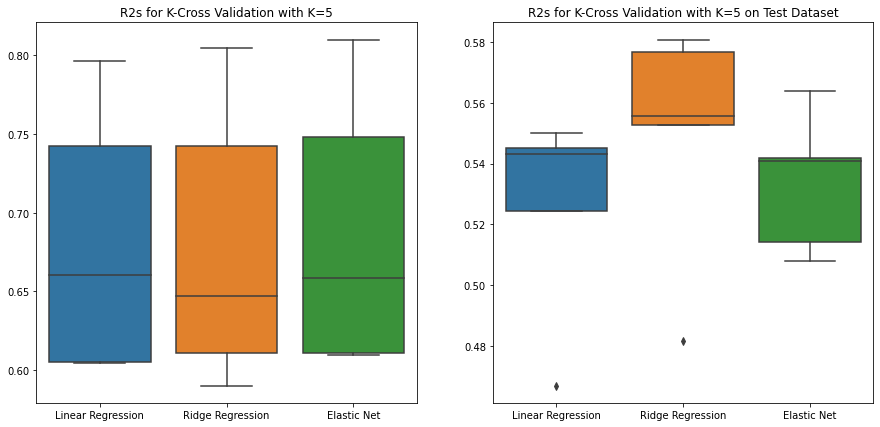

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7)) # create 2x2 array of subplots
axes[0].title.set_text("R2s for K-Cross Validation with K=5")
sns.boxplot(data=CV_R2s, ax = axes[0])
axes[1].title.set_text("R2s for K-Cross Validation with K=5 on Test Dataset")
sns.boxplot(data=test_R2s, ax = axes[1])

As for the R-squareds, we can see that one of the splits achieved around 0.8 for all 3 approaches. On the test dataset, the higher R-squared was around 0.58 for Elastic Net, which indicates that the 3 regression approaches did not explain the variance in the test dataset as well as they did in the training dataset.

Finally, from our results, it can be inferred that Ridge Regression and Elastic Net result in better performance than Simple Linear Regression, which indicates that it's always good to add a little regularization.